# CONTROL CONTINU : ML Avancé Optimisation

## NOM : TAYAWELBA DAWAI HESED - KIA-22-2A-435




### Le dataset Churn_Modelling est un ensemble de données qui contient les informations de 10 000 clients d’une banque fictive. L’objectif est de prédire si un client va quitter la banque ou non en fonction de son profil et de son comportement. Pour cela, on dispose de 11 variables explicatives:

###### creditScore: le score de crédit du client, qui mesure sa solvabilité
###### Geography: le pays du client (France, Spain ou Germany)
###### Gender: le sexe du client (Male ou Female)
###### Age: l’âge du client
###### Tenure: le nombre d’années que le client est avec la banque
###### Balance: le solde du compte du client
###### NumOfProducts: le nombre de produits que le client a avec la banque (compte courant, épargne, crédit, etc.)
###### HasCrCard: si le client possède une carte de crédit ou non (0 ou 1)
###### IsActiveMember: si le client est un membre actif ou non (0 ou 1), c’est-à-dire s’il utilise fréquemment les services de la banque
###### EstimatedSalary: le salaire estimé du client
###### Exited: si le client a quitté la banque ou non (0 ou 1), qui est la variable cible à prédire

### Il s’agit donc d’un problème de classification binaire, où l’on cherche à distinguer les clients fidèles des clients partants. Pour résoudre ce problème, on va utiliser la bibliothèque PyCaret, qui est une bibliothèque de machine learning à faible code en Python qui automatise les workflows de machine learning. PyCaret permet de réaliser des expériences de bout en bout rapidement et efficacement, en utilisant des fonctions simples et cohérentes. PyCaret s’occupe également du prétraitement des données, comme la mise à l’échelle, l’encodage, la sélection des caractéristiques, etc. PyCaret offre également la possibilité de comparer et d’optimiser différents algorithmes de machine learning, ainsi que de déployer et de suivre les modèles entraînés.

#### Importer les bibliothèques nécessaires

In [1]:
import pandas as pd # Pour manipuler les données tabulaires
import numpy as np # Pour effectuer des opérations numériques
import seaborn as sns # Pour créer des visualisations statistiques
import matplotlib.pyplot as plt # Pour tracer des graphiques
import pycaret as py # Pour automatiser le processus d'apprentissage automatique

#### Importer les modules spécifiques de pycaret pour différents types de problèmes

In [2]:
from pycaret.regression import * # Pour la régression
from pycaret.classification import * # Pour la classification
from pycaret.clustering import * # Pour le clustering
from pycaret.anomaly import * # Pour la détection d'anomalies


In [3]:
# Modifier l'option d'affichage pour voir toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)
# Charger les données à partir d'un fichier csv
data = pd.read_csv("Churn_Modelling.csv")
# Afficher les cinq premières lignes des données
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Afficher la forme du dataframe (nombre de lignes et de colonnes)
data.shape

(10000, 14)

In [5]:
data.drop(["RowNumber"],axis=1,inplace=True)

In [6]:
data.drop(["CustomerId"],axis=1,inplace=True)


In [7]:
data.drop(["Surname"],axis=1,inplace=True)

In [8]:
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Afficher les statistiques descriptives des variables numériques
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Afficher les informations sur les types de données et les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
# Calculer le nombre de valeurs manquantes par colonne
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# Remplacer les 0 par des valeurs manquantes (NaN) dans la colonne Balance
#data["Balance"] = data["Balance"].replace(0, np.nan)
# Remplacer les valeurs manquantes par la moyenne dans la colonne Balance
#data["Balance"] = data["Balance"].fillna(data["Balance"].mean())

In [13]:
# Encoder la colonne Gender en 0 pour Female et 1 pour Male
#data["Gender"] = data["Gender"].map({"Female": 0, "Male": 1})

In [14]:
# Afficher les cinq premières lignes des données après les transformations
data.head()
# Afficher les informations sur les types de données et les valeurs manquantes après les transformations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
# Afficher les valeurs uniques de la colonne Exited (variable cible)
data.Exited.unique()

array([1, 0], dtype=int64)

In [16]:
# Importer le module de classification de pycaret
from pycaret.classification import *
# Initialiser l'environnement d'apprentissage automatique avec les paramètres choisis
exp_clf = setup(data, target="Exited",train_size=0.8,normalize=True,normalize_method="minmax")

,Description,Value
0,Session id,7768
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(8000, 13)"
6,Transformed test set shape,"(2000, 13)"
7,Ordinal features,1
8,Numeric features,8
9,Categorical features,2


In [17]:
# Comparer les modèles de classification disponibles et les trier par précision
compare_models(sort="Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8634,0.8670,0.4675,0.7715,0.5812,0.5057,0.5288,3.9730
rf,Random Forest Classifier,0.8625,0.8520,0.4613,0.7720,0.5764,0.5008,0.5250,4.0380
lightgbm,Light Gradient Boosting Machine,0.8572,0.8587,0.4810,0.7258,0.5776,0.4962,0.5118,4.4050
ada,Ada Boost Classifier,0.8551,0.8451,0.4656,0.7248,0.5662,0.4843,0.5018,3.8220
et,Extra Trees Classifier,0.8542,0.8438,0.4325,0.7465,0.5465,0.4671,0.4924,3.8620
xgboost,Extreme Gradient Boosting,0.8535,0.8456,0.4865,0.7031,0.5745,0.4897,0.5021,3.5060
nb,Naive Bayes,0.8172,0.7793,0.3613,0.5856,0.4452,0.3434,0.3586,3.3180
knn,K Neighbors Classifier,0.8140,0.7399,0.3049,0.5827,0.3992,0.3022,0.3247,3.7580
lr,Logistic Regression,0.8100,0.7585,0.1883,0.6066,0.2866,0.2112,0.2598,4.9930
ridge,Ridge Classifier,0.8049,0.0000,0.1086,0.6246,0.1838,0.1317,0.1986,3.0690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7768, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
# Créer le meilleur modèle selon la comparaison (lightgbm)
best_model = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8538,0.8272,0.4724,0.7130,0.5683,0.4846,0.4994
1,0.8625,0.8796,0.4908,0.7477,0.5926,0.5141,0.5306
2,0.8475,0.8353,0.4479,0.6952,0.5448,0.4583,0.4743
3,0.8600,0.8641,0.4540,0.7629,0.5692,0.4920,0.5156
4,0.8662,0.8713,0.5215,0.7456,0.6137,0.5359,0.5484
5,0.8512,0.8739,0.4663,0.7037,0.5609,0.4757,0.4904
6,0.8650,0.8453,0.5092,0.7477,0.6058,0.5279,0.5421
7,0.8400,0.8243,0.3865,0.6923,0.4961,0.4099,0.4346
8,0.8675,0.8786,0.5276,0.7478,0.6187,0.5414,0.5535


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
# Afficher les paramètres et les performances du meilleur modèle
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7768, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [20]:
# Optimiser le meilleur modèle en ajustant ses hyperparamètres
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8488,0.8317,0.4724,0.6875,0.5600,0.4724,0.4846
1,0.8775,0.8877,0.5460,0.7876,0.6449,0.5738,0.5879
2,0.8475,0.8331,0.4479,0.6952,0.5448,0.4583,0.4743
3,0.8675,0.8702,0.4601,0.8065,0.5859,0.5140,0.5427
4,0.8725,0.8758,0.5644,0.7480,0.6434,0.5676,0.5759
5,0.8638,0.8744,0.5031,0.7455,0.6007,0.5223,0.5370
6,0.8638,0.8479,0.5153,0.7368,0.6065,0.5272,0.5395
7,0.8475,0.8269,0.4233,0.7113,0.5308,0.4466,0.4681
8,0.8675,0.8686,0.5215,0.7522,0.6159,0.5390,0.5522


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


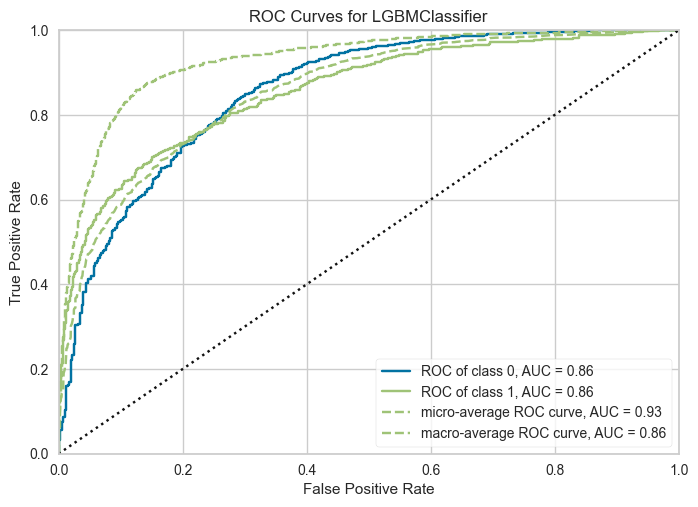

In [21]:
# Tracer la courbe ROC du meilleur modèle
plot_model(best_model,plot="auc")

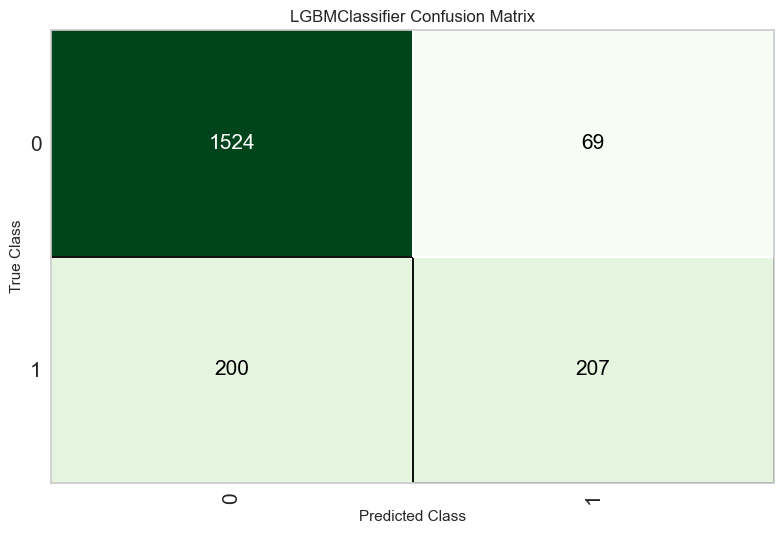

In [22]:
plot_model(best_model,"confusion_matrix")

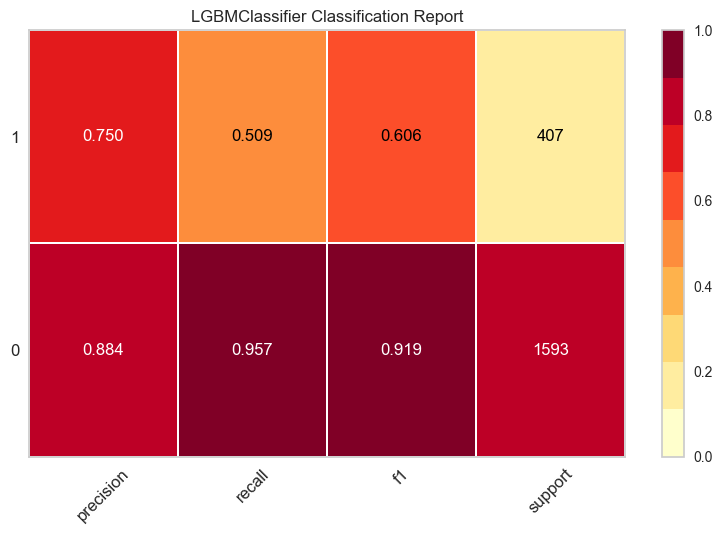

In [23]:
plot_model(best_model,"class_report")

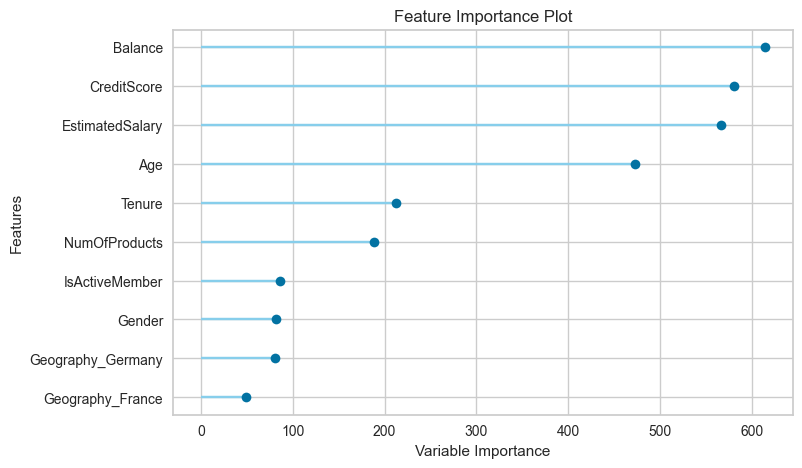

In [24]:

plot_model(best_model, plot = 'feature')

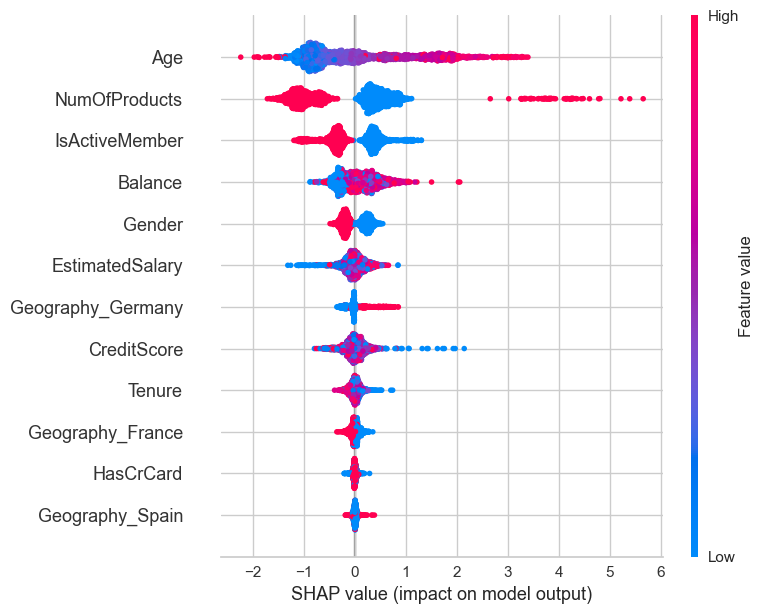

In [25]:
interpret_model(best_model)

In [26]:
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8655,0.8552,0.5086,0.7500,0.6061,0.5286,0.5431


In [27]:
finalize_model(best_model)

Pipeline(memory=FastMemory(location=C:\Users\heses\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'HasCrCard', 'IsActiveMember',
                                             'EstimatedSalary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy=...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split'

In [28]:
save_model(best_model,"lxgb")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\heses\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy=...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importanc

In [29]:
model = load_model("lxgb")

Transformation Pipeline and Model Successfully Loaded


In [30]:
create_app(best_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [31]:

final_best = finalize_model(best_model)

save_model(final_best, 'pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\heses\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy=...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importanc